# Lista 4 

Nome: Diogo José Costa Alve

N° USP: 13709881

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fft as spfft
import matplotlib.pyplot as plt

### Exercício 4.11

In [22]:
def cria_f(N):
    t = np.arange(0,1,1/N)
    f = np.sin(10*math.pi*t)
    f[N//2:] = 0.5
    return f

def cria_v(N, M):
    v = np.zeros(N)
    v[0:M] = 1/M
    return v

def conv(x,h):
    X = spfft.fft(x)
    H = spfft.fft(h)
    W = X * H
    w = spfft.ifft(W)
    return w

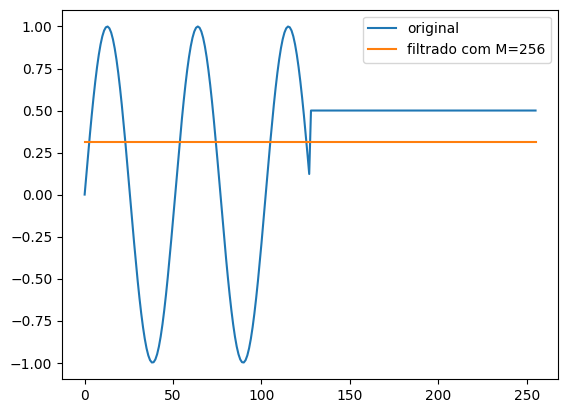

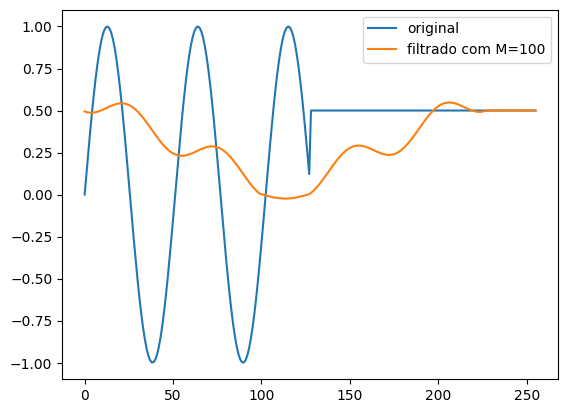

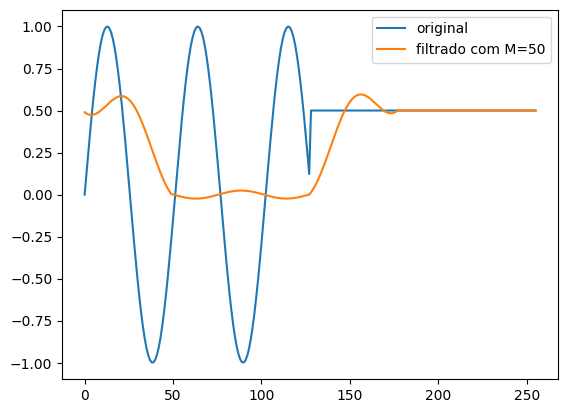

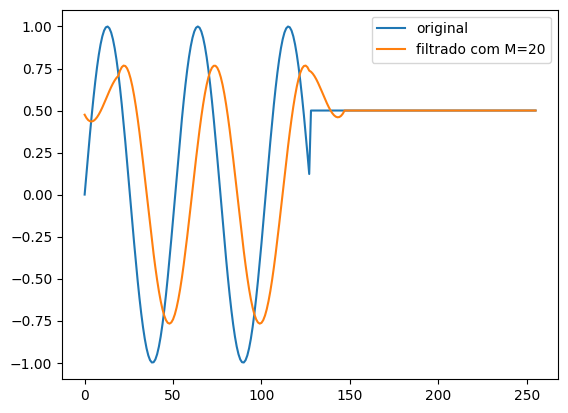

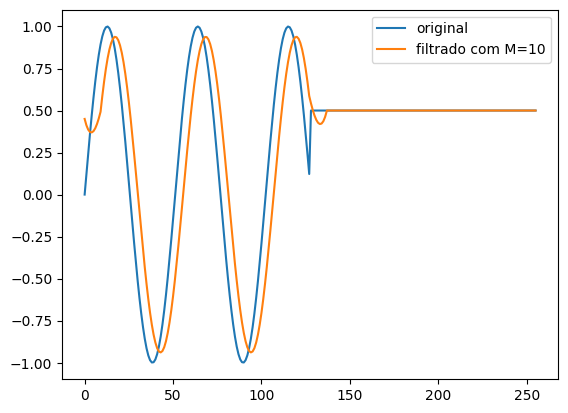

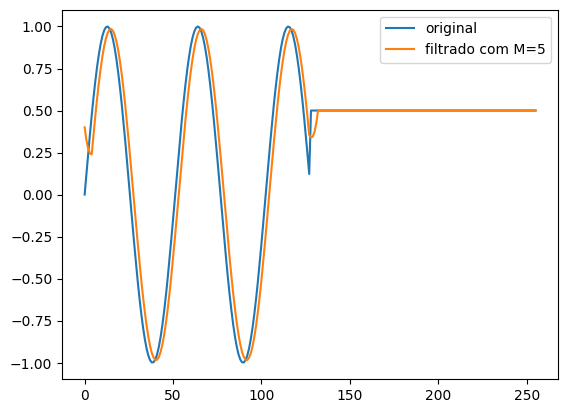

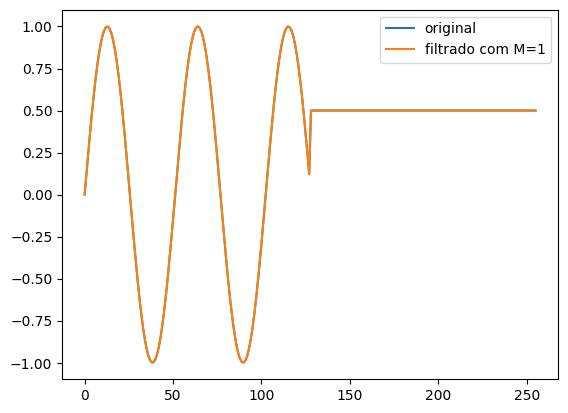

<Figure size 640x480 with 0 Axes>

In [29]:
Ms = [256, 100, 50, 20, 10, 5, 1]
N=256
# Ms = [10, 5, 1]

f = cria_f(N)

for M in Ms:
    v = cria_v(256, M)
    w = conv(f,v)
    plt.plot(f, label='original')
    plt.plot(w, label=f'filtrado com M={M}')
    plt.legend()
    plt.figure()

### Explicação questão 4.11

O vetor de filtro v é um vetor da média que depende de (M-1) valores futuros. 

Isso explica a suavização mais intensa, a medida que aumentamos o M.
Isso também explica o delay, atraso no tempo, progressivo a medida que o M aumenta.
Tanto a suavização, quanto o atraso não existem quando M=1.



-------------------------
## Início questão 4.13

In [196]:
from scipy.linalg import circulant

def cria_Enk(N=4):
    t = np.arange(0,N,1)
    k = np.arange(0,N,1).reshape((N,1))
    return np.exp(1j*2*math.pi*k*t/N)

def checa_autovalores(H,autovalores):
    N = len(H)
    found = np.zeros(N)
    autovalores_copy = autovalores.copy()
    for m in range(N):
        for n in range(len(autovalores_copy)):
            if np.isclose(H[m], autovalores_copy[n]):
                found[m] = 1
                np.delete(autovalores_copy,n)
                break
    assert found.all(), f'Falhou. Algum H[m] não foi encontrado entre os autovalores \nencontrado={found}'
    print('Todos H[m] encontados entre os autovalores')

def checa_autovetores(Enk_norm, autovetores_norm):
    rows, cols= Enk_norm.shape
    found_rows = np.zeros(rows)
    autovetores_norm_t_copy = (autovetores_norm.T).copy()
    
    for row in range(rows):
        for col in range(cols):
            for i in range(autovetores_norm_t_copy.shape[0]):
                found = np.zeros(rows)
                for j in range(autovetores_norm_t_copy.shape[1]):
                    Enk_norm[row][col]
                    autovetores_norm_t_copy[i][j]
                    if np.isclose(Enk_norm[row][col], autovetores_norm_t_copy[i][j]):
                        found[j] = 1
                if found.all():
                    found_rows[row] = 1
                    np.delete(autovetores_norm_t_copy, i)
                    break
                        
    assert found_rows.all(), f'Falhou. Não encontrou alguma linha da base normalizada Enk entre os autovetores \nencontrado={found_rows}'
    print('Todas as linhas de Enk normalizadas estão entre os autovetores normalizados')    

In [197]:
h = np.array([1+1j,5-2j,-7,2+3j])
H = spfft.fft(h)
Mh = circulant(h)
E4 = cria_Enk(4)
E4_norm = E4/np.linalg.norm(E4, axis=1)
autovalores, autovetores_norm = np.linalg.eig(Mh)

checa_autovalores(H, autovalores)
checa_autovetores(E4_norm, autovetores_norm)

Todos H[m] encontados entre os autovalores
Todas as linhas de Enk normalizadas estão entre os autovetores normalizados


#### Argumente como o teorema 4.3 pode ser verificado para o exemplo escolhido.

A ideia é checar a definiçao do teorema em três etapas.
1. Calcular autovetores e autovalores da matriz circulante utilizando a função de referência np.linalg.eig.
2. Confirmar se todos os H[m] estão entre os autovalores retornados pela função de referência.
3. Confirmar se todas os elementos da base Enk estão entre os autovetores retornado pela função de referência.

Como a função de referência retorna os autovalores normalizados, então a confirmação se todos elementos de Enk estão presentes os autovetores deve ser realizados com Enk também normalizada.


